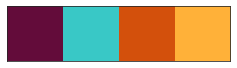

In [1]:
from typing import NamedTuple
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [2]:
songs = pd.read_csv(".\dataset\mySongsDataset.csv")

songs.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2889 non-null   object 
 1   artist        2889 non-null   object 
 2   id            2889 non-null   object 
 3   danceability  2889 non-null   float64
 4   energy        2889 non-null   float64
 5   loudness      2889 non-null   float64
 6   speechiness   2889 non-null   float64
 7   acousticness  2889 non-null   float64
 8   tempo         2889 non-null   float64
 9   liveness      2889 non-null   float64
 10  valence       2889 non-null   float64
dtypes: float64(8), object(3)
memory usage: 248.4+ KB


In [3]:
songs.head()

,name,artist,id,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.603,-4.892,0.2260,0.02720,123.061,0.1670,0.497
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.390,-11.033,0.0524,0.83700,87.512,0.1010,0.530
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.692,-6.643,0.0262,0.47800,104.095,0.0446,0.965
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.849,-5.216,0.0833,0.00014,94.964,0.4230,0.503
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.916,-4.698,0.0644,0.00285,186.941,0.2630,0.338


In [4]:
songs = songs.drop(['energy','valence','tempo'],axis=1)
loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

In [5]:
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.913635,0.2260,0.02720,0.1670
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.750193,0.0524,0.83700,0.1010
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.867032,0.0262,0.47800,0.0446
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.905012,0.0833,0.00014,0.4230
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.918798,0.0644,0.00285,0.2630


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>, <AxesSubplot:>]],
      dtype=object)

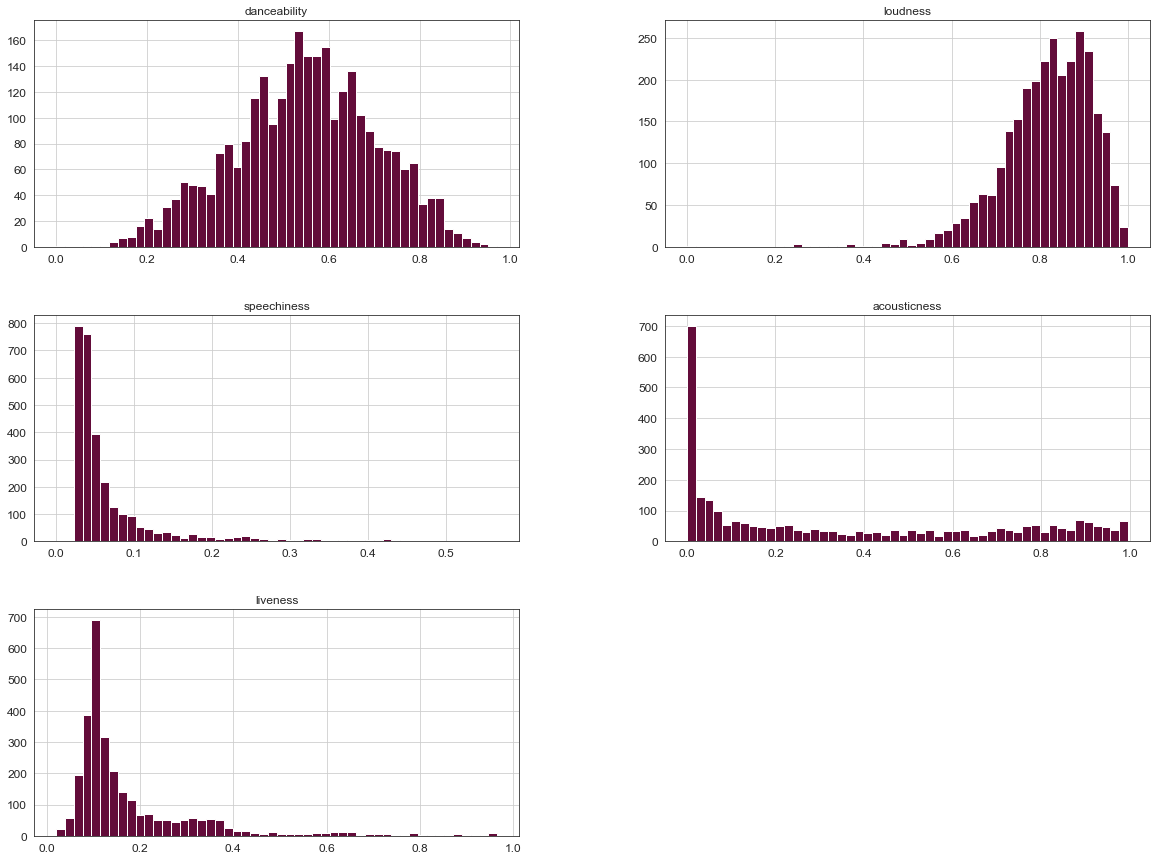

In [6]:
songs.hist(bins=50,figsize=(20,15))

In [7]:
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [9]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5076157656291582)
For n_clusters = 3, silhouette score is 0.3439260970009315)
For n_clusters = 4, silhouette score is 0.35288508901007054)
For n_clusters = 5, silhouette score is 0.2769827092333043)
For n_clusters = 6, silhouette score is 0.26109266344645127)
For n_clusters = 7, silhouette score is 0.26076802607561317)
For n_clusters = 8, silhouette score is 0.25480533819955903)
For n_clusters = 9, silhouette score is 0.25577548876287387)
For n_clusters = 10, silhouette score is 0.24943473406548322)
For n_clusters = 11, silhouette score is 0.24177831570697209)
For n_clusters = 12, silhouette score is 0.23851643597636313)
For n_clusters = 13, silhouette score is 0.2338184552052474)
For n_clusters = 14, silhouette score is 0.23085917597093986)


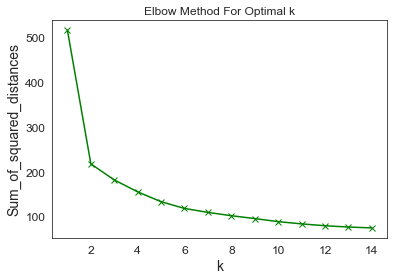

In [10]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(songs_features)

KMeans()

In [12]:
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

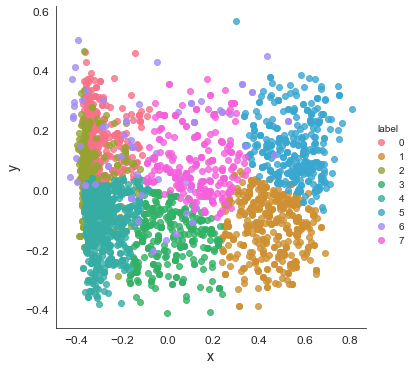

In [13]:

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [14]:
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

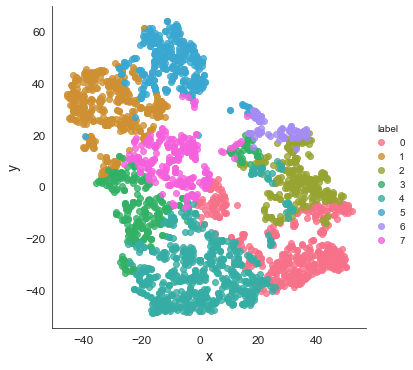

In [15]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [16]:
pca.explained_variance_ratio_

array([0.69392072, 0.1385622 ])

In [17]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.042347 -0.198992    -0.023744       0.97634 -0.069326
PC-2     -0.968245 -0.011416    -0.054485      -0.02846  0.242060


In [18]:
songs['label'] = y_kmeans

In [19]:
songs = songs.sample(frac=1)
songs['label'].value_counts()

4    664
0    478
1    448
5    355
3    316
2    283
7    263
6     82
Name: label, dtype: int64

In [20]:
songs[songs['label'] == 0].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
922,Break My Body,Pixies,5pVSOZVIWaRxF0zhjlnEUy,0.442,0.710510,0.0342,0.002520,0.1140,0
2198,Prey,The Neighbourhood,38kjFXYgPvtuXCPbHPMGte,0.517,0.910627,0.0477,0.025800,0.0622,0
2781,Landmine,Three Days Grace,1QGnq9t4JQTk80eGGn7gPN,0.518,0.933090,0.0794,0.001590,0.2300,0
1489,Hardcore (1° Escalão),GNR,7bkgzNRQSW2d7vrUR0af05,0.474,0.921060,0.1060,0.012400,0.0626,0
316,Your Best American Girl,Mitski,172rW45GEnGoJUuWfm1drt,0.360,0.786868,0.0315,0.015900,0.2260,0
2729,Wicked Stone,Slash,3N0qAwSM7bRsNi7BiJyDHb,0.503,0.981263,0.1430,0.000354,0.1970,0
486,"Sweet Dreams, TN",The Last Shadow Puppets,1W0OCrMsRP1SLTEdw3JwEz,0.282,0.859553,0.0291,0.000878,0.3800,0
103,Miles Away,Knuckle Puck,5V8drPxlKNNT5VTVWo9tD2,0.482,0.997977,0.0557,0.000028,0.1850,0
1140,Sono Com Medo,Primeira Dama,1Ug6cD12V9Z43nyWAGuWQZ,0.454,0.767014,0.0412,0.189000,0.1490,0
359,Skin Crawl,Alice Phoebe Lou,2ZuSycMbPyL3HQfvslSLlZ,0.302,0.890027,0.0332,0.228000,0.2150,0


In [21]:
songs[songs['label'] == 1].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
644,Chanel,Frank Ocean,6Nle9hKrkL1wQpwNfEkxjh,0.776,0.891278,0.2370,0.874,0.1120,1
190,Provider,Frank Ocean,6R6ihJhRbgu7JxJKIbW57w,0.654,0.726453,0.2820,0.740,0.1520,1
2236,Something Holy - Mahogany Sessions,Alice Phoebe Lou,2mYHtIEroRdYLU0bnkpako,0.495,0.796636,0.0555,0.670,0.1150,1
1872,Luna,Murta,4oc9AsrwiI3VwjIov3K2Rp,0.500,0.618130,0.0422,0.705,0.1480,1
1309,All Star,Nando Reis,0MyIKw2KXvcEjwtQY5H3Ms,0.574,0.802331,0.0444,0.790,0.1020,1
771,Funny Thing,Thundercat,1c5CllrZr45UBhWpIqM332,0.586,0.810369,0.4390,0.827,0.2120,1
464,The Sun Is In Your Eyes - Voice Memo,Jacob Collier,6BzQnbYMiASXdwTerVH3zy,0.531,0.730152,0.0393,0.864,0.1260,1
390,To Cope,Patricia Lalor,00lUYyg4bjlFI5hWlo1gcI,0.569,0.650866,0.0464,0.824,0.1080,1
1846,Still Beating,Mac DeMarco,2N4idqj9TT3HnH2OFT9j0v,0.709,0.763633,0.0417,0.581,0.1510,1
2370,$TING,The Neighbourhood,48YPDmhRIQRiusm5uCz5gX,0.566,0.879089,0.0505,0.622,0.0985,1


In [22]:
songs[songs['label'] == 2].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2776,Misery Loves My Company,Three Days Grace,1We9y0dSphaMHt4owfGWpw,0.516,0.908046,0.0402,0.001390,0.258,2
2372,No Grey,The Neighbourhood,2NNzvsOFpztTUUzk6rcnPH,0.830,0.895803,0.0494,0.050900,0.331,2
455,Flesh without Blood,Grimes,4ZcGbQ5dOKX6rJk4yvza9R,0.481,0.964176,0.0875,0.000904,0.476,2
2652,House On Fire,Rise Against,4c75xeSteTcgSSxRtsKqOJ,0.427,0.985628,0.0886,0.001550,0.459,2
2775,Anonymous,Three Days Grace,1xI7M6PDSXLll1dt9j2snA,0.493,0.904426,0.0435,0.017700,0.322,2
560,Secrets,The Weeknd,00NAQYOP4AmWR549nnYJZu,0.664,0.890027,0.0533,0.015500,0.460,2
2579,Gangsta's Paradise,Coolio,7lQWRAjyhTpCWFC0jmclT4,0.647,0.776355,0.0593,0.065500,0.398,2
809,II. Shadows,Childish Gambino,074OTSJiAus6qfpGKx3IJP,0.606,0.782956,0.1940,0.087800,0.332,2
2389,Shy-town,Gorillaz,1RBOXCG0fAegmM4VSz2MkZ,0.476,0.890267,0.0290,0.184000,0.385,2
611,Overthinking IT,WILLOW,2QXvhG5wkzZthF2OTMIaNz,0.369,0.879089,0.0695,0.014800,0.370,2


In [23]:
songs[songs['label'] == 3].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
679,"Analog 2 (feat. Tyler, The Creator, Frank Ocea...",Odd Future,0d8ONGx43ZprlHlmLZODpD,0.599,0.821255,0.5660,0.229,0.0660,3
1908,Comida Amarga,Carne Doce,5FGyopAgPjmsaFOpj4Bbxo,0.626,0.785351,0.0369,0.251,0.2990,3
2347,&burn (with Vince Staples),Billie Eilish,7uX3gufAoBVqKVoD3dBLLD,0.776,0.794959,0.3310,0.213,0.0969,3
2553,Somebody That I Used To Know,Gotye,1qDrWA6lyx8cLECdZE7TV7,0.865,0.859340,0.0371,0.548,0.0989,3
1628,God's Work (feat. iLL BLU),IAMDDB,2C0pnGNygYIDJky515Riw0,0.830,0.922710,0.1870,0.205,0.0801,3
1022,Someone New,Hozier,22sS7JkzeVeq4vOPCB6Fbj,0.593,0.885583,0.0349,0.407,0.2860,3
398,Mystery Lady (feat. Don Toliver),Masego,2Ee9amLUslOwgoJWZEpSSD,0.747,0.832060,0.1410,0.393,0.0982,3
230,My Outside,Alice Phoebe Lou,0peP7fjxkOgNqRvgnlqFuT,0.664,0.898092,0.0924,0.337,0.1410,3
1218,Two Weeks,Grizzly Bear,0iTpQYzJnYgh7kIxyq8A2O,0.537,0.894871,0.0286,0.289,0.0800,3
435,REALiTi (Demo),Grimes,1Haq3FvPaTsR07ti9hmmd6,0.721,0.779043,0.0324,0.521,0.0800,3


In [24]:
songs[songs['label'] == 4].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
169,Violence - Original Mix,Grimes,3KeOFns3LGJuh1lapMm9eA,0.533,0.911479,0.0495,0.001430,0.1290,4
503,Something's Missing,John Mayer,4ibzxSKw3a6rtIorruN5GO,0.545,0.953078,0.0302,0.098900,0.1310,4
122,Waste Love (feat. Madison Love),Machine Gun Kelly,581geNTL8gGJE3MEPY5tcE,0.617,0.865116,0.0420,0.015500,0.0935,4
2488,Strobelite (feat. Peven Everett),Gorillaz,6XGddj522FQRHXEhBtjiJu,0.640,0.913182,0.0869,0.040900,0.1360,4
46,"Hey Look Ma, I Made It",Panic! At The Disco,22oEJW6r2rMb9z4IntfyEa,0.577,0.955021,0.0695,0.013700,0.1210,4
835,Blue Blood,Foals,6lMwgZsRXzUjCZ8TJESk6b,0.607,0.838954,0.0430,0.125000,0.1360,4
717,Photoshop Handsome,Everything Everything,6PSqpcP7qP3ugM9D44LzUA,0.649,0.894099,0.0482,0.014100,0.0894,4
12,Let It Go,Summer Walker,4pfw8cfDRujkJDUgdkRKPH,0.650,0.869294,0.0477,0.069500,0.1000,4
909,Coldsweat,The Sugarcubes,1y0ajqgTuzUbvUbl7mIp8C,0.520,0.739095,0.0453,0.056400,0.0777,4
590,Wants and Needs (feat. Lil Baby),Drake,65OVbaJR5O1RmwOQx0875b,0.578,0.874857,0.2860,0.061800,0.1190,4


In [25]:
songs[songs['label'] == 5].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2089,Era o Fim,Tim Bernardes,3lFlpjYy1r914qX4tsW97g,0.294,0.772869,0.0317,0.818,0.5250,5
2059,Jour d'ete a la montagne: IV. Ronde,Eugène Bozza,7mTNvUrUrwDpipTQDWh0ep,0.505,0.534267,0.0592,0.996,0.1830,5
1782,Le Moulin,Yann Tiersen,6egKxCnIcsS4vrkjcdoh6h,0.565,0.607111,0.0535,0.991,0.0808,5
1890,White Ferrari,Frank Ocean,2LMkwUfqC6S6s6qDVlEuzV,0.444,0.628510,0.0366,0.784,0.3040,5
1202,I Will,Radiohead,28VoI90xDBoKe5sP3sP5jW,0.254,0.669630,0.0326,0.946,0.1130,5
2054,Photosynthesis,Alepo,5dD2Ss9vpmvjAZtWEPX7hU,0.526,0.661991,0.0843,0.895,0.1290,5
2061,Trois Aquarelles: Serenade,Philippe Gaubert,6x4AnBXmiZOnFHr4TCN5Ck,0.270,0.521545,0.0592,0.993,0.1130,5
2121,Devesas,Emmy Curl,5d39uE0Cfbg5c0Wl12AdnE,0.483,0.615602,0.0334,0.784,0.0538,5
1402,i love you,Billie Eilish,6CcJMwBtXByIz4zQLzFkKc,0.421,0.553190,0.0382,0.952,0.1090,5
1880,Paint,The Paper Kites,2BOof6lYrGfz6BojJ0aeJd,0.364,0.696458,0.0402,0.896,0.1230,5


In [26]:
songs[songs['label'] == 6].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
596,Good Days,SZA,3YJJjQPAbDT7mGpX3WtQ9A,0.436,0.821068,0.0583,0.499000,0.688,6
639,Boy,WILLOW,1gWgaCmXX9G5IxeyZPWooW,0.597,0.851542,0.0277,0.566000,0.540,6
246,Before the Worst,The Script,1DOOo1ZgHE8vhi2eXKDOLn,0.588,0.931227,0.0435,0.141000,0.655,6
578,EARFQUAKE,"Tyler, The Creator",5hVghJ4KaYES3BFUATCYn0,0.554,0.807867,0.0685,0.230000,0.795,6
222,Compass,The Neighbourhood,0YNtAadZvKBBEFARtfoCV8,0.700,0.897480,0.0329,0.238000,0.658,6
2521,Skeletons,Papa Roach,74Tt7hApV7itxVhZf3uDQv,0.366,0.980225,0.0839,0.000021,0.964,6
1645,"Neon - Live at the Nokia Theatre, Los Angeles,...",John Mayer,7AtsEX4pJqmAaIajlMwaPU,0.435,0.710697,0.0788,0.480000,0.949,6
451,Mercy Mercy,The Rare Occasions,24Pc46dlvmlLOCWocbNJby,0.362,0.893674,0.0646,0.102000,0.663,6
102,"#41 - Live at Radio City Music Hall, New York,...",Dave Matthews,0oUzMf8vvmoBbJGIXgeAoR,0.412,0.893860,0.0318,0.676000,0.724,6
2525,"Sucker for Pain (with Wiz Khalifa, Imagine Dra...",Lil Wayne,7qUJQSNX9QNf46CC6FgH66,0.502,0.927315,0.3170,0.255000,0.650,6


In [27]:
songs[songs['label'] == 7].tail(50)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1244,A Prosa,Terno Rei,6W8TTr0sNXOOlGsUvuZp7G,0.587,0.832752,0.0258,0.590,0.0816,7
2662,There's A Place - Remastered 2009,The Beatles,4dessGxnKXmTbHPhVgqODq,0.455,0.777447,0.0292,0.629,0.1720,7
2104,Eternal Flame,The Bangles,5MoDQWMDMaAGDEiWsJfeCi,0.526,0.851170,0.0243,0.525,0.0942,7
870,Wear & Tear - B-Side,Foals,5OD3wbgAjYxkfI33r89EU4,0.493,0.842014,0.0423,0.253,0.1080,7
1668,Woodland,The Paper Kites,431qZaQAJuIolwBrlDa6Yg,0.435,0.790940,0.0410,0.535,0.1620,7
882,Jóga,Björk,18NehrWLUFK7NPH522YQMQ,0.226,0.875442,0.0650,0.403,0.0797,7
1319,Não Olha Assim Pra Mim,OUTROEU,6Nhhr4fy6YKwLfoo3GDugB,0.381,0.696112,0.0439,0.578,0.1110,7
1361,Teimas Ceticas,Emmy Curl,6IMBWqdlvkcCanLyS04pCU,0.598,0.543103,0.0377,0.406,0.1030,7
1419,From Eden,Hozier,0bkW98npv8EsWQ2fXFzK56,0.395,0.898518,0.0498,0.608,0.1170,7
1230,Live Well,Palace,2H30WL3exSctlDC9GyRbD4,0.496,0.900514,0.0269,0.264,0.0695,7


In [28]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred = rfc.predict(X_test)

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[165   0   0   0   0   0   0   1]
 [  0 153   0   0   0   1   0   1]
 [  5   0  87   0   0   0   0   0]
 [  0   0   0  93   2   0   0   2]
 [  3   0   2   0 221   0   0   0]
 [  0   2   0   0   0 107   0   0]
 [  0   1   3   0   0   0  16   0]
 [  0   0   0   4   0   3   1  81]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

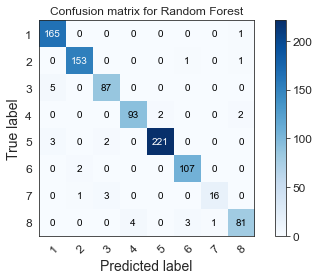

In [31]:
definitions=['1','2','3','4','5','6','7','8']

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [32]:
import pickle

with open('MOODAI.pickle','wb') as fe_data_file:
     pickle.dump(rfc, fe_data_file)

In [33]:
#Code Example
#Import the module
#import pickle
#Load the data - No need to do Feature Engineering again
#with open('fe_data.pickle','rb') as fe_data_file:
#     feature_engineered_data = pickle.load(fe_data_file)
#Continue with your modeling